In [317]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib import gridspec
from matplotlib import rcParams
from scipy.optimize import curve_fit
import scipy.stats as stats
from matplotlib import lines
import seaborn as sns
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
import math


import pandas as pd
import glob

#thinter to tbe able to choose a meta data file
#import tkinter as tk
#from tkinter import filedialog#to open dialog box to choose file
#from tkinter.filedialog import askopenfilename

In [318]:
cd ~/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/AnalysisSTFX/Selectivity/

/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/AnalysisSTFX/Selectivity


In [319]:
#filedir ='C:/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/RatioSTFX/' #windows
filedir ='/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/AnalysisSTFX/Selectivity/'
filedirExportFig ='/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/AnalysisSTFX/AnalysisNterm/FiguresFromNotebook/'

#root = tk.Tk()
#root.withdraw() not sure if becessary, description to avoid opening full gui

#either choose a cetain file or open dialog box
filename = 'SummaryVrev.xlsx'
#filename = filedialog.askopenfilename()
#root.update() # necessary in Mac(?) to close the dialog box

In [320]:
xl = pd.ExcelFile(filedir+filename)
xl.sheet_names

df = xl.parse("SelAlldata") #calls for Sheet names 
df.head()

,Injection,CellID,StartSol,VrStart,Iminus85Start,TestSol,VrTest,Iminus85Test,Vd,Permeability,Ratio
0,mg418mg419mg012,STFX063001,NaGluSel1,0.010510,1.247815e-05,KGluSel,-0.016925,5.534604e-06,-0.027435,0.342437,0.443544
1,mg418mg012,STFX063003,NaGluSel1,0.003413,7.573976e-07,KGluSel,0.001076,7.079405e-07,-0.002337,0.912756,0.934701
2,mg418mg419mg012,STFX063004,NaGluSel1,-0.004414,8.208025e-06,KGluSel,-0.047026,2.034570e-06,-0.042612,0.189280,0.247876
3,mg418mg012,STFX063007,NaGluSel1,0.006440,4.775261e-07,KGluSel,0.006163,5.362270e-07,-0.000277,0.989235,1.122927
4,mg418mg012,STFX063008,NaGluSel1,0.006882,7.171729e-07,KGluSel,0.002580,7.076569e-07,-0.004303,0.845284,0.986731


In [321]:
filenameMeta = '/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/MetaDataSTFX/'

In [357]:
listofFiles = ['106','108','109','110','111']#'100','101','102','103','104','105',



In [358]:
AllMetaData = pd.DataFrame()

for i in range(len(listofFiles)):
    df_temp = pd.read_excel(filenameMeta+'TEVCMetaSTFX'+listofFiles[i]+'-Selectivity.xlsx', sep="," )
    AllMetaData = AllMetaData.append(df_temp,ignore_index=True)
    
print(AllMetaData['CellID'].head())

0    STFX106001
1    STFX106002
2    STFX106004
3    STFX106005
4    STFX106006
Name: CellID, dtype: object


In [359]:
AllMetaData['CellID'][29]

'STFX108006'

In [360]:
filenameRatio = '/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/RatioSTFX/'

In [361]:
colNames = ['Date',
            'Injection',
           'CellID',
           'StartSol',
           'VrStart',
           'Iminus85Start',
           'TestSol',
           'VrTest',
           'Iminus85Test',
           'Vd',
           'Permeability',
           'Ratio']

In [373]:
test = pd.DataFrame(columns=colNames)

TESTDIC = {"Injection":[],"CellID":[],"StartSol":[],"VrStart":[],'Iminus85Start':[],"TestSol":[],"VrTest":[],'Iminus85Test':[]}

for i in range(len(AllMetaData['CellID'])): #range(28,29
    try:
        df_temp = pd.read_csv(filenameRatio+'Selectivity-TEVC-'+AllMetaData['CellID'][i]+'.txt', sep="\t" )
    except FileNotFoundError:
        continue
    else:
        df_temp = pd.read_csv(filenameRatio+'Selectivity-TEVC-'+AllMetaData['CellID'][i]+'.txt', sep="\t" )
        #print(df_temp.head())
        if len(df_temp) % 2 == 0:
            NewLoc = 0
            #print("{0} is Even".format(len(df_temp)))
            for m in range(int(len(df_temp)/2)):

                TESTDIC["Injection"].append(df_temp.loc[m,'Injection'])
                TESTDIC["CellID"].append(df_temp.loc[NewLoc,'CellIDRec'])

                TESTDIC["StartSol"].append(df_temp.loc[NewLoc,'TestSol'])
                TESTDIC["VrStart"].append(df_temp.loc[NewLoc,'Vrev'])
                TESTDIC["Iminus85Start"].append(df_temp.loc[NewLoc,'CurMinus85'])

                TESTDIC["TestSol"].append(df_temp.loc[NewLoc+1,'TestSol'])
                TESTDIC["VrTest"].append(df_temp.loc[NewLoc+1,'Vrev'])
                TESTDIC["Iminus85Test"].append(df_temp.loc[NewLoc+1,'CurMinus85'])

                #print(NewLoc)
                NewLoc = NewLoc +2
                #print(NewLoc)
                #NewLoc = NewLoc + 10
                #print(NewLoc)

        else:
           # print("{0} is Odd".format(len(df_temp)))
            NewLoc = 0
            for m in range(int((len(df_temp)-1)/2)): #check if -1 works for more than 3 rows, for 5???
                TESTDIC["Injection"].append(df_temp.loc[NewLoc,'Injection'])
                TESTDIC["CellID"].append(df_temp.loc[NewLoc,'CellIDRec'])

                TESTDIC["StartSol"].append(df_temp.loc[NewLoc,'TestSol'])
                TESTDIC["VrStart"].append(df_temp.loc[NewLoc,'Vrev'])
                TESTDIC["Iminus85Start"].append(df_temp.loc[NewLoc,'CurMinus85'])

                TESTDIC["TestSol"].append(df_temp.loc[NewLoc+1,'TestSol'])
                TESTDIC["VrTest"].append(df_temp.loc[NewLoc+1,'Vrev'])
                TESTDIC["Iminus85Test"].append(df_temp.loc[NewLoc+1,'CurMinus85'])

                #TESTDIC["Iminus85Test"].dropna(how = 'any')
                
                #print(NewLoc)
                NewLoc = NewLoc +2
  

new = pd.DataFrame.from_dict(TESTDIC)

new = new.dropna(how='any')

new['Vd'] = new["VrTest"]-new["VrStart"]
new['Permeability'] = 1/(np.exp(new['Vd'].values*1000/25.6*-1))
new['Ratio'] = new["Iminus85Test"]/new["Iminus85Start"]

#print(new['Permeability'])



In [363]:
#new['test'] = new['Vd'].apply(np.exp(new['Vd'].values*1000/25.6*-1))

In [364]:
AxisTickLabelSize = 8
AxisLabelSize = 10
AxisLegendSize = 8
SizeOfMarker = 3
ErrorColor = 'red'

SizeOfMarker = 2
SizeofLine = 0.5

In [365]:
#Selectivity-TEVC-STFX105001.tx

In [366]:
# calculate P0 for mg418
#colors = ['black']
colors = []
for i in range(50):
    colors.append("red")


#colors = ['black','red','yellow','yellow','red','black','red','red', 'black','black','black', 'yellow','black','black',
      #'red','red','black','red']
#colors = [(0.30, 0.69, 0.29),(0.60, 0.31,0.64),(0.89, 0.11,0.10),(1, 0.50,0),(0.22,0.49,0.72),(0.00, 0.00, 0.00),"red","blue",(0.00, 0.00, 0.00),(0.22, 0.49, 0.72),(1.00, 0.50, 0.00),"darkgreen",(0.30, 0.69, 0.29),(0.30, 0.69, 0.29),(0.6, 0.31, 0.64)]

# Create here all the different Data Sets

In [367]:
ReNameAlanin ={'F84A':'mg738mg012',# 
         'K85A':'mg739mg012',
         'E86A':'mg740mg012',
         #'F87A':'mg741mg012',
         'C88A':'mg748mg012',
         'Y89A':'mg759mg012',
         'K90A':'mg745mg012',
         #'T91A':'mg752mg012',
         #'S92A':'mg749mg012',
         'ctr A93':'mg419mg012',
         'H94A':'mg750mg012',
         #'G95A':'mg746mg012',
         #'I96A':'mg747mg012',
         'P97A':'mg760mg012',
         'M98A':'mg753mg012',
         #'I99A':'mg761mg012',
         'G100A':'mg751mg012'      
        }

# ReNameChimera={#'M4-NtermDT1':'mg755mg012',
#                'M4-DT1ABC':'mg733mg012',
#                'M4-DT1A':'mg734mg012',
#                #'M4-DT1B':'mg735mg012',
#                'M4-DT1C':'mg742mg012',
#                #'DT1-NtermM4':'mg756mg012',
#                #'DT1-M4ABC':'mg736mg012',
#                #'DT1-M4A':'mg737mg012',
#                'DT1-M4B':'mg757mg012',
#                'DT1-M4C':'mg758mg012',
#         }

ReNameChimera={ 'ctr A93':'mg419mg012',
#               'M4-DT1ABC':'mg733mg012',
#       'M4-DT1A':'mg734mg012',
#                'M4-DT1A':'mg734mg012',
#                'M4-DT1B':'mg735mg012',
               'M4-DT1C':'mg742mg012',
#                 'M4+M4-DT1A':'mg419mg734mg012',
#                'M4+M4-DT1B':'mg419mg735mg012',
#                'M4+M4-DT1C':'mg419mg742mg012',
               #'DT1-NtermM4':'mg756mg012',
               #'DT1-M4ABC':'mg736mg012',
#                'DT1-M4A':'mg737mg012',
#                'DT1-M4B':'mg757mg012',
#                'DT1-M4C':'mg758mg012',
        }


#print(ReNameAlanin)
LabelAlanin = list(ReNameAlanin.keys())
LabelChimera = list(ReNameChimera.keys())

In [368]:
#re-arranging data Alanin
#UninjAndAlanin = ["uninjected"]
UninjAndAlanin = []

for i in range(len(LabelAlanin)):
    UninjAndAlanin.append(ReNameAlanin[LabelAlanin[i]])
    
#Potassium = df[(df.Injection.isin(["uninjected","mg419mg012","mg738mg012","mg739mg012","mg740mg012","mg741mg012","mg748mg012","mg759mg012","mg745mg012","mg752mg012","mg749mg012","mg750mg012","mg746mg012","mg747mg012", "mg760mg012","mg753mg012","mg761mg012","mg751mg012"])) & (df.TestSol.isin(["KGluSel"]))] 
Potassium = df[(df.Injection.isin(UninjAndAlanin)) & (df.TestSol.isin(["KGluSel"]))] 
Lithium = df[(df.Injection.isin(UninjAndAlanin)) & (df.TestSol.isin(["LiGluSel"]))] 
Nmg = df[(df.Injection.isin(UninjAndAlanin)) & (df.TestSol.isin(["NmgGluSel"]))] 

#re-arranging data chimera
UninjAndChimera = []
for i in range(len(LabelChimera)):
    UninjAndChimera.append(ReNameChimera[LabelChimera[i]])
    
PotassiumChimera = df[(df.Injection.isin(UninjAndChimera)) & (df.TestSol.isin(["KGluSel"]))] 
LithiumChimera = df[(df.Injection.isin(UninjAndChimera)) & (df.TestSol.isin(["LiGluSel"]))] 
NmgChimera = df[(df.Injection.isin(UninjAndChimera)) & (df.TestSol.isin(["NmgGluSel"]))] 


# calculate Number of experiments

In [369]:
Potassium.pivot(columns='Injection', values='TestSol').describe().T 

,count,unique,top,freq
Injection,,,,
mg419mg012,13,1,KGluSel,13
mg738mg012,11,1,KGluSel,11
mg739mg012,7,1,KGluSel,7
mg740mg012,6,1,KGluSel,6
mg745mg012,4,1,KGluSel,4
mg748mg012,10,1,KGluSel,10
mg750mg012,8,1,KGluSel,8
mg751mg012,7,1,KGluSel,7
mg753mg012,10,1,KGluSel,10


In [54]:
Lithium.pivot(columns='Injection', values='TestSol').describe().T 

,count,unique,top,freq
Injection,,,,
mg419mg012,7,1,LiGluSel,7
mg738mg012,4,1,LiGluSel,4
mg739mg012,4,1,LiGluSel,4
mg740mg012,4,1,LiGluSel,4
mg748mg012,4,1,LiGluSel,4
mg750mg012,3,1,LiGluSel,3
mg751mg012,3,1,LiGluSel,3
mg753mg012,3,1,LiGluSel,3
mg759mg012,4,1,LiGluSel,4


In [55]:
Nmg.pivot(columns='Injection', values='TestSol').describe().T 

,count,unique,top,freq
Injection,,,,
mg419mg012,7,1,NmgGluSel,7
mg738mg012,1,1,NmgGluSel,1
mg739mg012,4,1,NmgGluSel,4
mg740mg012,3,1,NmgGluSel,3
mg748mg012,3,1,NmgGluSel,3
mg750mg012,4,1,NmgGluSel,4
mg751mg012,2,1,NmgGluSel,2
mg753mg012,3,1,NmgGluSel,3
mg759mg012,2,1,NmgGluSel,2


In [56]:
PotassiumChimera.pivot(columns='Injection', values='TestSol').describe().T 

,count,unique,top,freq
Injection,,,,
mg419mg012,13,1,KGluSel,13
mg742mg012,9,1,KGluSel,9


In [57]:
LithiumChimera.pivot(columns='Injection', values='TestSol').describe().T 

,count,unique,top,freq
Injection,,,,
mg419mg012,7,1,LiGluSel,7
mg742mg012,5,1,LiGluSel,5


In [58]:
NmgChimera.pivot(columns='Injection', values='TestSol').describe().T 

,count,unique,top,freq
Injection,,,,
mg419mg012,7,1,NmgGluSel,7
mg742mg012,7,1,NmgGluSel,7


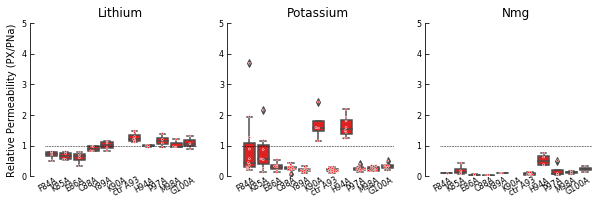

In [59]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9.5, 3))

orderCons = UninjAndAlanin #["uninjected","mg419mg012","mg738mg012","mg739mg012","mg740mg012","mg741mg012","mg748mg012","mg759mg012","mg745mg012","mg752mg012","mg749mg012","mg750mg012","mg746mg012","mg747mg012", "mg760mg012","mg753mg012","mg761mg012","mg751mg012"]

labels2 = []
for i in range(0,len(LabelAlanin)):
    #labels2.append('')
    labels2.append(LabelAlanin[i])
    
sns.swarmplot(x= Potassium['Injection'], y=Potassium['Permeability'], data = Potassium,palette=sns.color_palette(colors), edgecolor='white', linewidth=SizeofLine, ax = axes[1], size = SizeOfMarker,order=orderCons)#order=["mg419mg012","pTL69mg012","mg418mg012","mg418mg419mg012"]
sns.boxplot(x= Potassium['Injection'], y=Potassium['Permeability'], data = Potassium, palette=sns.color_palette(colors),ax=axes[1],order=orderCons)

sns.swarmplot(x= Lithium['Injection'], y=Lithium['Permeability'], data =Lithium,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, ax = axes[0], size = SizeOfMarker,order=orderCons)#order=["mg419mg012","pTL69mg012","mg418mg012","mg418mg419mg012"]
sns.boxplot(x= Lithium['Injection'], y=Lithium['Permeability'], data = Lithium, palette=sns.color_palette(colors),ax=axes[0],order=orderCons)

sns.swarmplot(x= Nmg['Injection'], y=Nmg['Permeability'], data =Nmg,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, ax = axes[2], size = SizeOfMarker,order=orderCons)#order=["mg419mg012","pTL69mg012","mg418mg012","mg418mg419mg012"]
sns.boxplot(x= Nmg['Injection'], y=Nmg['Permeability'], data = Nmg, palette=sns.color_palette(colors),ax=axes[2],order=orderCons)


YlimitPerm = [0,5]

for i in range(3): 
    axes[i].set_ylim(YlimitPerm)
    axes[i].spines['right'].set_visible(False)                                  # no spine at the right
    axes[i].spines['top'].set_visible(False)  # no spine at the top
    axes[i].spines['bottom'].set_visible(False)
    axes[i].yaxis.set_ticks_position('left')                                     # ticks at the left
    axes[i].xaxis.set_ticks_position('bottom')                                 # no spine at the right
    axes[i].spines['left'].set_position(('outward',15))                           # a spine at the left that is put a little aside
    axes[i].spines['bottom'].set_position(('outward',10))  
    axes[i].spines['top'].set_position(('axes',5)) 
    axes[i].get_yaxis().set_tick_params(direction='in')
    axes[i].get_xaxis().set_tick_params(direction='in')
    #axes[i].plot([-1,50], [0.2,0.2] , 'k--', color='#111111', linewidth=1) #gray line for Zero or 1   
    axes[i].plot([-1,50], [1,1] , 'k--', color='#000000', linewidth=SizeofLine)
    #ax1.plot([-1,50], [0.2,0.2] , 'k--', color='#111111', linewidth=1) #gray line for Zero or 1     
    axes[i].tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)   
    axes[i].yaxis.label.set_size(AxisLabelSize)
    axes[i].xaxis.set_visible(False)
    
    n=0.5
    for M in range(len(labels2)):    
        axes[i].text(n, -0.2, labels2[M],ha='right',rotation=30,fontsize= AxisLegendSize)
        n = n+1
        #axes[i].set_ylabel('Relative Permeability (PK/PNa)', fontsize=AxisLabelSize)

axes[1].set_title('Potassium',size=AxisLabelSize+2)    
axes[0].set_title('Lithium',size=AxisLabelSize+2) 
axes[2].set_title('Nmg',size=AxisLabelSize+2)

axes[1].set_ylabel('')
axes[2].set_ylabel('')

#axes[1].set_ylabel('Relative Permeability (PK/PNa)', fontsize=AxisLabelSize)
axes[0].set_ylabel('Relative Permeability (PX/PNa)', fontsize=AxisLabelSize)
#axes[2].set_ylabel('Relative Permeability (PK/PNa)', fontsize=AxisLabelSize)

plt.gcf().subplots_adjust(bottom=0.17, left=0.1,right=None, top=None,hspace=0.75, wspace=0.3)  

plt.savefig(filedirExportFig+"PermeabilityNtermAlaninWithCurrent"+'.pdf')
    

## Permeability Chimera

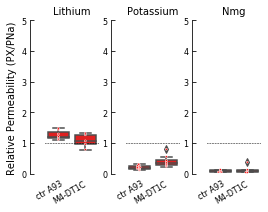

In [60]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(4, 3))

orderCons = UninjAndChimera #["uninjected","mg419mg012","mg738mg012","mg739mg012","mg740mg012","mg741mg012","mg748mg012","mg759mg012","mg745mg012","mg752mg012","mg749mg012","mg750mg012","mg746mg012","mg747mg012", "mg760mg012","mg753mg012","mg761mg012","mg751mg012"]

labels2 = []
for i in range(0,len(LabelChimera)):
    #labels2.append('')
    labels2.append(LabelChimera[i])
    
sns.swarmplot(x= PotassiumChimera['Injection'], y=PotassiumChimera['Permeability'], data = PotassiumChimera,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, ax = axes[1], size = SizeOfMarker,order=orderCons)#order=["mg419mg012","pTL69mg012","mg418mg012","mg418mg419mg012"]
sns.boxplot(x= PotassiumChimera['Injection'], y=PotassiumChimera['Permeability'], data = PotassiumChimera, palette=sns.color_palette(colors),ax=axes[1],order=orderCons)

sns.swarmplot(x= LithiumChimera['Injection'], y=LithiumChimera['Permeability'], data = LithiumChimera,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, ax = axes[0], size = SizeOfMarker,order=orderCons)#order=["mg419mg012","pTL69mg012","mg418mg012","mg418mg419mg012"]
sns.boxplot(x= LithiumChimera['Injection'], y=LithiumChimera['Permeability'], data = LithiumChimera, palette=sns.color_palette(colors),ax=axes[0],order=orderCons)

sns.swarmplot(x= NmgChimera['Injection'], y=NmgChimera['Permeability'], data = NmgChimera,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, ax = axes[2], size =SizeOfMarker,order=orderCons)#order=["mg419mg012","pTL69mg012","mg418mg012","mg418mg419mg012"]
sns.boxplot(x= NmgChimera['Injection'], y=NmgChimera['Permeability'], data = NmgChimera, palette=sns.color_palette(colors),ax=axes[2],order=orderCons)


YlimitPerm = [0,5]

for i in range(3): 
    axes[i].set_ylim(YlimitPerm)
    axes[i].spines['right'].set_visible(False)                                  # no spine at the right
    axes[i].spines['top'].set_visible(False)  # no spine at the top
    axes[i].spines['bottom'].set_visible(False)
    axes[i].yaxis.set_ticks_position('left')                                     # ticks at the left
    axes[i].xaxis.set_ticks_position('bottom')                                 # no spine at the right
    axes[i].spines['left'].set_position(('outward',15))                           # a spine at the left that is put a little aside
    axes[i].spines['bottom'].set_position(('outward',10))  
    axes[i].spines['top'].set_position(('axes',5)) 
    axes[i].get_yaxis().set_tick_params(direction='in')
    axes[i].get_xaxis().set_tick_params(direction='in')
    #axes[i].plot([-1,50], [0.2,0.2] , 'k--', color='#111111', linewidth=1) #gray line for Zero or 1   
    axes[i].plot([-1,50], [1,1] , 'k--', color='#000000', linewidth=SizeofLine)
    #ax1.plot([-1,50], [0.2,0.2] , 'k--', color='#111111', linewidth=1) #gray line for Zero or 1     
    axes[i].tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)   
    axes[i].yaxis.label.set_size(AxisLabelSize)
    axes[i].xaxis.set_visible(False)
    
    n=0.2
    for M in range(len(labels2)):    
        axes[i].text(n, -0.4, labels2[M],ha='right',rotation=30,fontsize= AxisLegendSize)
        n = n+0.9
        #axes[i].set_ylabel('Relative Permeability (PK/PNa)', fontsize=AxisLabelSize)

axes[1].set_title('Potassium',size=AxisLabelSize)    
axes[0].set_title('Lithium',size=AxisLabelSize) 
axes[2].set_title('Nmg',size=AxisLabelSize)

axes[1].set_ylabel('')
axes[2].set_ylabel('')

#axes[1].set_ylabel('Relative Permeability (PK/PNa)', fontsize=AxisLabelSize)
axes[0].set_ylabel('Relative Permeability (PX/PNa)', fontsize=AxisLabelSize)
#axes[2].set_ylabel('Relative Permeability (PK/PNa)', fontsize=AxisLabelSize)

plt.gcf().subplots_adjust(bottom=0.17, left=0.15,right=None, top=None,hspace=0.75, wspace=0.5)  

plt.savefig(filedirExportFig+"PermeabilityNtermChimera"+'.pdf')
    

# Control Quality Check

# Calculate the Quality of Recordings by Rating

In [61]:
Potassium[Potassium.Injection.isin(['mg419mg012'])]

,Injection,CellID,StartSol,VrStart,Iminus85Start,TestSol,VrTest,Iminus85Test,Vd,Permeability,Ratio
52,mg419mg012,STFX068025,NaGluSel1,0.004743,2.098349e-05,KGluSel,-0.039250,3.717829e-06,-0.043992,0.179344,0.177179
53,mg419mg012,STFX068026,NaGluSel1,0.001860,2.901035e-05,KGluSel,-0.044569,4.518321e-06,-0.046429,0.163061,0.155749
67,mg419mg012,STFX068033,NaGluSel1,0.002056,2.813952e-05,KGluSel,-0.053966,2.344847e-06,-0.056021,0.112104,0.083329
75,mg419mg012,STFX069002,NaGluSel1,0.022733,2.383687e-05,KGluSel,-0.026148,3.754497e-06,-0.048882,0.148164,0.157508
87,mg419mg012,STFX069005,NaGluSel1,0.017716,1.975298e-05,KGluSel,-0.028468,3.509793e-06,-0.046183,0.164633,0.177684
107,mg419mg012,STFX069011,NaGluSel1,0.012795,2.446645e-05,KGluSel,-0.028259,4.690286e-06,-0.041055,0.201151,0.191703
111,mg419mg012,STFX069011,NaGluSel1,0.008419,2.446645e-05,KGluSel,-0.026976,4.690286e-06,-0.035395,0.250917,0.191703
123,mg419mg012,STFX069014,NaGluSel1,0.002806,2.791988e-05,KGluSel,-0.027379,6.649986e-06,-0.030185,0.307555,0.238181
141,mg419mg012,STFX100020,NaGluSel1,0.004873,1.300000e-05,KGluSel,-0.029979,2.730000e-06,-0.034853,0.256292,0.210000
161,mg419mg012,STFX101017,NaGluSel1,0.028392,6.300000e-07,KGluSel,-0.011600,2.700000e-07,-0.039992,0.209673,0.428571


In [62]:
len(Potassium[Potassium.Injection.isin(['mg419mg012'])]['Injection'])

13

# Change in current 

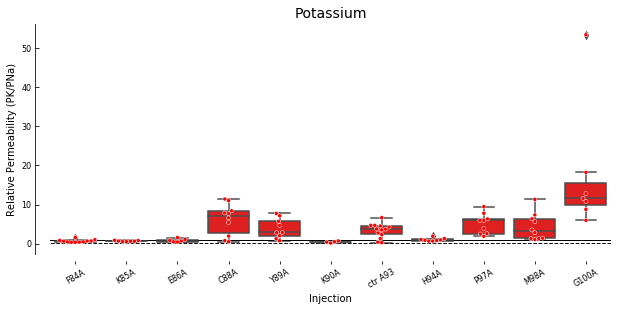

In [63]:
fig = plt.figure(figsize=(12, 4.5)) 
#plt.subplots(2, 2, sharex='col')
ax1 = plt.subplot(1,1,1)


orderCons = UninjAndAlanin #["uninjected","mg419mg012","mg738mg012","mg739mg012","mg740mg012","mg741mg012","mg748mg012","mg759mg012","mg745mg012","mg752mg012","mg749mg012","mg750mg012","mg746mg012","mg747mg012", "mg760mg012","mg753mg012","mg761mg012","mg751mg012"]

#labels2 = ['Uninj']
labels2 = []
for i in range(0,len(LabelAlanin)):
    #labels2.append('')
    labels2.append(LabelAlanin[i])
sns.swarmplot(x= Potassium['Injection'], y=Potassium['Iminus85Test']*1000000, data = Potassium,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, ax = ax1, size = 4,order=orderCons)#order=["mg419mg012","pTL69mg012","mg418mg012","mg418mg419mg012"]
sns.boxplot(x= Potassium['Injection'], y=Potassium['Iminus85Test']*1000000, data = Potassium, palette=sns.color_palette(colors),ax=ax1,order=orderCons)


#sns.swarmplot(y=Datamg418['PCs/Na-DT1d'], data = Datamg418,palette=sns.color_palette(colorsSINGLES), edgecolor='white', linewidth=0.5, size = 4)


YlimitPerm = [0,2]

##### AXIS 1 ####
#ax1.set_ylim(YlimitPerm)
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)  # no spine at the top
ax1.spines['bottom'].set_visible(False)  
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',15))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',10))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
ax1.plot([-1,50], [0.2,0.2] , 'k--', color='#111111', linewidth=1) #gray line for Zero or 1   
ax1.plot([-1,50], [1,1] , 'k-', color='#000000', linewidth=1)
#ax1.plot([-1,50], [0.2,0.2] , 'k--', color='#111111', linewidth=1) #gray line for Zero or 1     
ax1.tick_params(axis='both', which='major', labelsize=8)  
ax1.set_title('Potassium',size=14) 
ax1.yaxis.label.set_size(20)
ax1.set_ylabel('Relative Permeability (PK/PNa)', fontsize=10)

#ax1.xaxis.set_visible(False)
ax1.set_xticklabels(labels2,rotation=30)



plt.gcf().subplots_adjust(bottom=0.17, left=0.25,right=None, top=None,hspace=0.75, wspace=0.2) 

plt.savefig(filedirExportFig+"PotassiumPermeabilityNtermAlaninWithCurrent"+'.pdf')

#F84 - K90 = A (7)
#T91 - G95 = B (5-1 = 4)
#I96 - G100 = C (5)


